In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np


# Loading Dataset

df_customer = pd.read_csv("/content/dim_customer.csv")
df_customer.head()


,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [56]:
df_delivery_partner = pd.read_csv("/content/dim_delivery_partner_.csv")
df_delivery_partner.head()

,delivery_partner_id,partner_name,city,vehicle_type,employment_type,avg_rating,is_active
0,DP09615,Neha E,Bengaluru,Scooter,Full-time,3.77,Y
1,DP02021,Neha V,Bengaluru,Bike,Full-time,3.90,Y
2,DP05541,Vikas S,Delhi,Cycle,Part-time,3.33,Y
3,DP13859,Amit B,Delhi,Cycle,Part-time,4.07,N
4,DP08091,Arjun R,Mumbai,Car,Full-time,4.63,Y


In [57]:
df_menu_item = pd.read_csv("/content/dim_menu_item.csv")
df_menu_item.head()

,menu_item_id,restaurant_id,item_name,category,is_veg,price
0,MENU12962_3216,REST12962,Paneer Tikka Pizza,Pizza,Y,271.05
1,MENU12962_1962,REST12962,Pepperoni Pizza,Pizza,N,327.26
2,MENU14069_0510,REST14069,Egg Fried Rice,Fried Rice,N,200.01
3,MENU14069_4308,REST14069,Paneer Tikka,Starters,Y,198.83
4,MENU08622_7574,REST08622,Kadai Paneer,Curries,Y,271.60


In [58]:
df_restaurant = pd.read_csv("/content/dim_restaurant.csv")
df_restaurant.head()

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y


In [59]:
df_delivery_performance = pd.read_csv("/content/fact_delivery_performance.csv")
df_delivery_performance.head()

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4


In [60]:
df_order_items = pd.read_csv("/content/fact_order_items.csv")
df_order_items.head()

,order_id,item_id,menu_item_id,restaurant_id,quantity,unit_price,item_discount,line_total
0,ORD202501006518,ITEM001,MENU12962_3216,REST12962,2,48.31,0.00,96.62
1,ORD202501006518,ITEM002,MENU12962_1962,REST12962,3,61.24,0.00,183.71
2,ORD202501019281,ITEM001,MENU14069_0510,REST14069,2,87.19,0.00,174.38
3,ORD202501019281,ITEM002,MENU14069_4308,REST14069,3,84.67,0.00,254.00
4,ORD202501023439,ITEM001,MENU08622_7574,REST08622,2,235.81,35.44,436.18


In [61]:
df_orders = pd.read_csv("/content/fact_orders.csv")
df_orders.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N


In [62]:
fact_ratings = pd.read_csv("/content/fact_ratings.csv")
fact_ratings.head()

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70


In [63]:
# Data Cleaning and Transformation

In [64]:
# Define Crisis Period (Assumption: Crisis starts May 1st, 2025)
CRISIS_START_DATE = '2025-05-01'

# Prepare df_orders: Convert timestamp and define phase
df_orders['order_timestamp'] = pd.to_datetime(df_orders['order_timestamp'])
df_orders['order_date'] = df_orders['order_timestamp'].dt.date
df_orders['phase'] = df_orders['order_date'].apply(
    lambda x: 'Crisis' if x >= pd.to_datetime(CRISIS_START_DATE).date() else 'Pre-Crisis'
)

# Prepare df_ratings: Convert timestamp and define month
fact_ratings['review_timestamp'] = pd.to_datetime(fact_ratings['review_timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')
fact_ratings = fact_ratings.dropna(subset=['review_timestamp', 'rating']).copy()
fact_ratings['review_month'] = fact_ratings['review_timestamp'].dt.to_period('M')

# Merge City information for Orders (used in Q4)
orders_with_city = df_orders.merge(
    df_restaurant[['restaurant_id', 'city']],
    on='restaurant_id',
    how='left'
)

In [65]:
# Define the strict periods for consistency across Q1-Q9:
PRE_CRISIS_START = pd.to_datetime('2025-01-01').date()
PRE_CRISIS_END = pd.to_datetime('2025-05-31').date()
CRISIS_START = pd.to_datetime('2025-06-01').date()
CRISIS_END = pd.to_datetime('2025-09-30').date()

# Prepare df_orders: Convert timestamp and define phase
df_orders['order_timestamp'] = pd.to_datetime(df_orders['order_timestamp'])
df_orders['order_date'] = df_orders['order_timestamp'].dt.date
df_orders['order_month'] = df_orders['order_timestamp'].dt.to_period('M')

def define_phase(date):
    if PRE_CRISIS_START <= date <= PRE_CRISIS_END:
        return 'Pre-Crisis'
    elif CRISIS_START <= date <= CRISIS_END:
        return 'Crisis'
    return 'Other'

df_orders['phase'] = df_orders['order_date'].apply(define_phase)
# Filter down to only the relevant analysis periods for all Qs (1-9)
analysis_df = df_orders[df_orders['phase'] != 'Other'].copy()

# Prepare df_ratings: Convert timestamp and define month
fact_ratings['review_timestamp'] = pd.to_datetime(fact_ratings['review_timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')
fact_ratings = fact_ratings.dropna(subset=['review_timestamp', 'rating']).copy()
fact_ratings['review_month'] = fact_ratings['review_timestamp'].dt.to_period('M')

# Merge City information for Orders (used in Q2, Q4)
orders_with_city = analysis_df.merge(
    df_restaurant[['restaurant_id', 'city']],
    on='restaurant_id',
    how='left'
)

In [66]:
# Primary Analysis Question

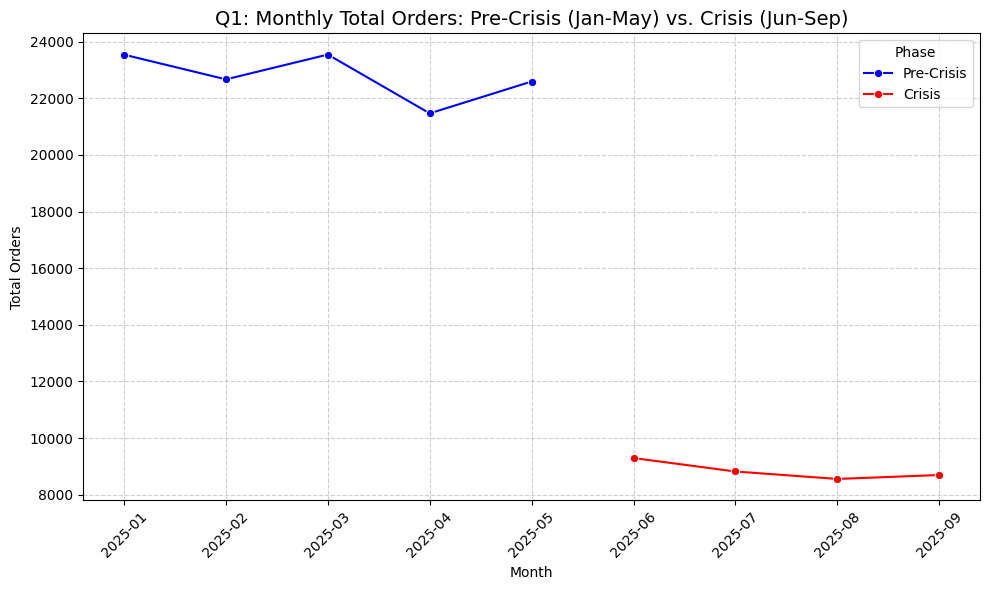

In [67]:
# Q1. Monthly Orders Trend and Decline Severity
# ====================================================

# Calculate Monthly Orders
monthly_orders = analysis_df.groupby(['order_month', 'phase'])['order_id'].count().reset_index()
monthly_orders['month_str'] = monthly_orders['order_month'].astype(str)
monthly_orders.rename(columns={'order_id': 'Total Orders'}, inplace=True)

# Calculate Total Orders by Phase and Decline Percentage
total_orders_by_period = analysis_df.groupby('phase')['order_id'].count()
pre_crisis_orders = total_orders_by_period.get('Pre-Crisis', 0)
crisis_orders = total_orders_by_period.get('Crisis', 0)

if pre_crisis_orders > 0:
    decline_percentage = ((pre_crisis_orders - crisis_orders) / pre_crisis_orders) * 100
else:
    decline_percentage = 0

# Visualization (Q1)
plt.figure(figsize=(10, 6))
sns.lineplot(x='month_str', y='Total Orders', hue='phase', data=monthly_orders, marker='o', palette={'Pre-Crisis': 'blue', 'Crisis': 'red'})
plt.title('Q1: Monthly Total Orders: Pre-Crisis (Jan-May) vs. Crisis (Jun-Sep)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

Top 5 Cities by Percentage Order Decline (Pre-Crisis vs Crisis):

     city  Crisis Orders  Pre-Crisis Orders  Decline (%)
  Chennai           3463              11537    69.983531
  Kolkata           3226              10470    69.188157
Bengaluru           8700              28219    69.169708
Hyderabad           3589              11546    68.915642
Ahmedabad           2916               9355    68.829503


/tmp/ipython-input-3352825359.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decline (%)', y='city', data=top_5_city_decline, palette='Blues_d')


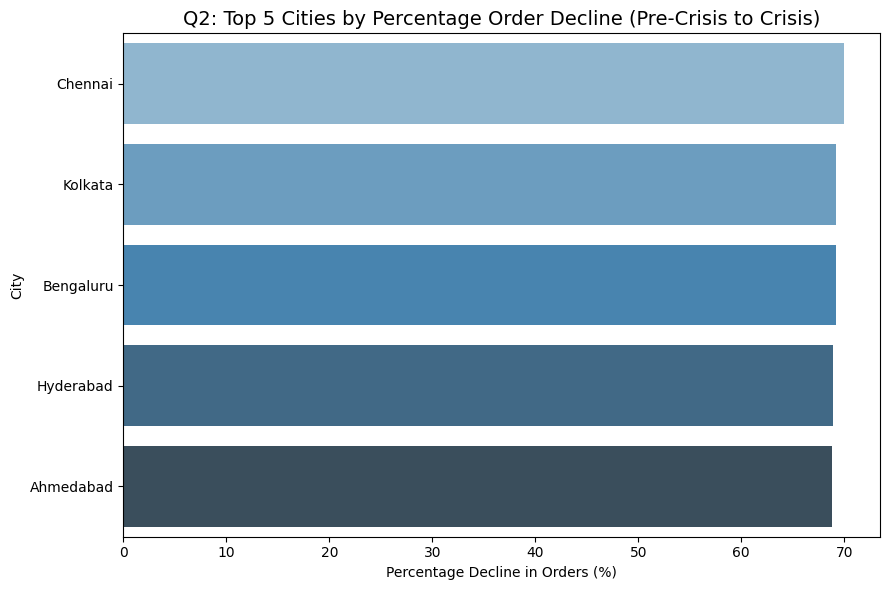

In [68]:
# Q2. Top 5 City Decline
# ====================================================

# Calculate orders by city and phase
city_orders = orders_with_city.groupby(['city', 'phase'])['order_id'].count().unstack(fill_value=0)
city_orders.columns = ['Crisis Orders', 'Pre-Crisis Orders']

# Filter for cities with non-zero pre-crisis orders
city_orders = city_orders[city_orders['Pre-Crisis Orders'] > 0].copy()

# Calculate percentage decline
city_orders['Decline (%)'] = (
    (city_orders['Pre-Crisis Orders'] - city_orders['Crisis Orders']) /
    city_orders['Pre-Crisis Orders']
) * 100

# Top 5 decline
top_5_city_decline = city_orders.sort_values('Decline (%)', ascending=False).head(5).reset_index()

# Print the actual data output before visualization
print("Top 5 Cities by Percentage Order Decline (Pre-Crisis vs Crisis):\n")
print(top_5_city_decline.to_string(index=False))

# Visualization (Q2)
plt.figure(figsize=(9, 6))
sns.barplot(x='Decline (%)', y='city', data=top_5_city_decline, palette='Blues_d')
plt.title('Q2: Top 5 Cities by Percentage Order Decline (Pre-Crisis to Crisis)', fontsize=14)
plt.xlabel('Percentage Decline in Orders (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [69]:
# Q3. Top 10 High-Volume Restaurant Decline

restaurant_orders = analysis_df.groupby(['restaurant_id', 'phase'])['order_id'].count().unstack(fill_value=0)
restaurant_orders.columns = ['Crisis Orders', 'Pre-Crisis Orders']

high_volume_restaurants = restaurant_orders[restaurant_orders['Pre-Crisis Orders'] >= 50].copy()
high_volume_restaurants['Decline (%)'] = (
    (high_volume_restaurants['Pre-Crisis Orders'] - high_volume_restaurants['Crisis Orders']) /
    high_volume_restaurants['Pre-Crisis Orders']
) * 100

# Added condition
if (high_volume_restaurants['Decline (%)'] <= 0).all():
    print("No decline is present.")
else:
    top_10_restaurant_decline = high_volume_restaurants.sort_values('Decline (%)', ascending=False).head(10).reset_index()
    top_10_restaurant_decline = top_10_restaurant_decline.merge(
        df_restaurant[['restaurant_id', 'restaurant_name']],
        on='restaurant_id',
        how='left'
    )
    top_10_restaurant_decline = top_10_restaurant_decline[
        ['restaurant_name', 'Pre-Crisis Orders', 'Crisis Orders', 'Decline (%)']
    ]

No decline is present.


Overall Cancellation Analysis by Phase:

     phase  total_orders  total_cancelled  cancellation_rate
    Crisis         35360             4218          11.928733
Pre-Crisis        113806             6894           6.057677

Top 5 Cities by Cancellation Rate (Crisis Phase):

     city  cancellation_rate  total_cancelled  total_orders
Ahmedabad          13.031550              380          2916
   Mumbai          12.348024              650          5264
  Chennai          12.185966              422          3463
Hyderabad          12.092505              434          3589
  Kolkata          11.965282              386          3226


/tmp/ipython-input-2907560957.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phase', y='cancellation_rate', data=cancellation_analysis, palette='magma')
/tmp/ipython-input-2907560957.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cancellation_rate', y='city', data=crisis_cancellations, palette='viridis')


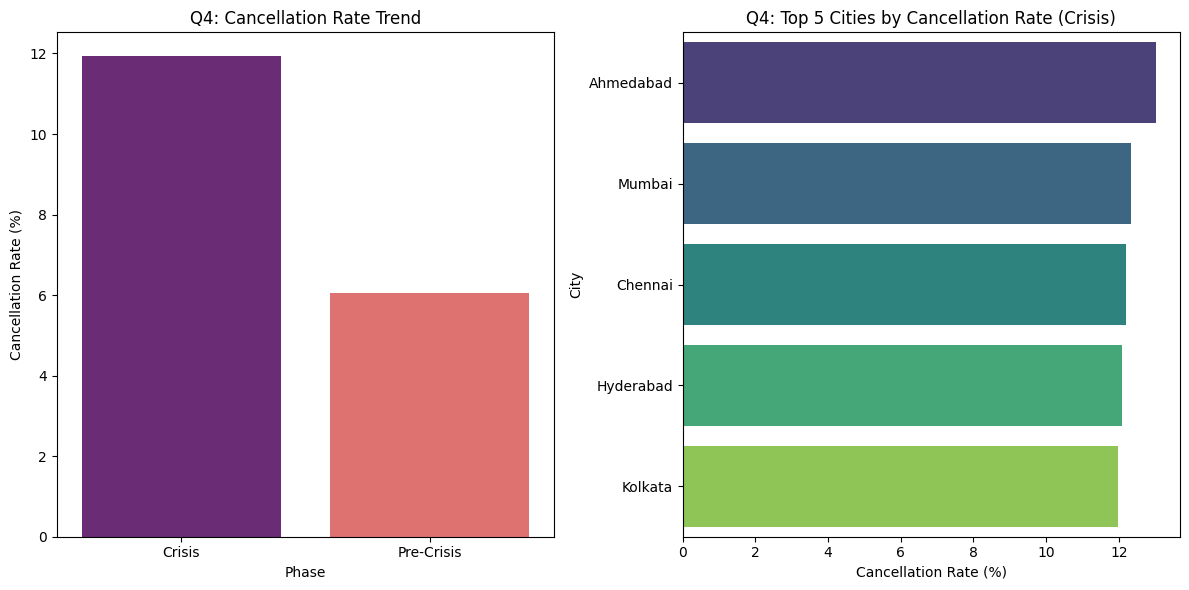

In [70]:
# Q4. Cancellation Analysis
# ====================================================

# Calculate overall cancellation rate by phase
cancellation_analysis = orders_with_city.groupby('phase')['is_cancelled'].agg(
    total_orders='count',
    total_cancelled=lambda x: (x == 'Y').sum()
)
cancellation_analysis['cancellation_rate'] = (
    cancellation_analysis['total_cancelled'] / cancellation_analysis['total_orders']
) * 100
cancellation_analysis = cancellation_analysis.reset_index()

# Calculate cancellation rate by city and phase
city_cancellation = orders_with_city.groupby(['phase', 'city'])['is_cancelled'].agg(
    total_orders='count',
    total_cancelled=lambda x: (x == 'Y').sum()
).reset_index()
city_cancellation['cancellation_rate'] = (
    city_cancellation['total_cancelled'] / city_cancellation['total_orders']
) * 100

# Top 5 cities with highest cancellation rate during the Crisis phase
crisis_cancellations = (
    city_cancellation[city_cancellation['phase'] == 'Crisis']
    .sort_values('cancellation_rate', ascending=False)
    .head(5)
)

print("Overall Cancellation Analysis by Phase:\n")
print(cancellation_analysis.to_string(index=False))
print("\nTop 5 Cities by Cancellation Rate (Crisis Phase):\n")
print(crisis_cancellations[['city', 'cancellation_rate', 'total_cancelled', 'total_orders']].to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))

# Cancellation rate trend by phase
plt.subplot(1, 2, 1)
sns.barplot(x='phase', y='cancellation_rate', data=cancellation_analysis, palette='magma')
plt.title('Q4: Cancellation Rate Trend', fontsize=12)
plt.xlabel('Phase')
plt.ylabel('Cancellation Rate (%)')

# Top 5 cities by cancellation rate during crisis
plt.subplot(1, 2, 2)
sns.barplot(x='cancellation_rate', y='city', data=crisis_cancellations, palette='viridis')
plt.title('Q4: Top 5 Cities by Cancellation Rate (Crisis)', fontsize=12)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('City')

plt.tight_layout()
plt.show()


Delivery SLA Compliance Analysis by Phase:

     phase  avg_delivery_time_min  sla_compliance_rate
    Crisis              60.117647            12.203054
Pre-Crisis              39.522424            43.604907


/tmp/ipython-input-3170443192.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3170443192.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


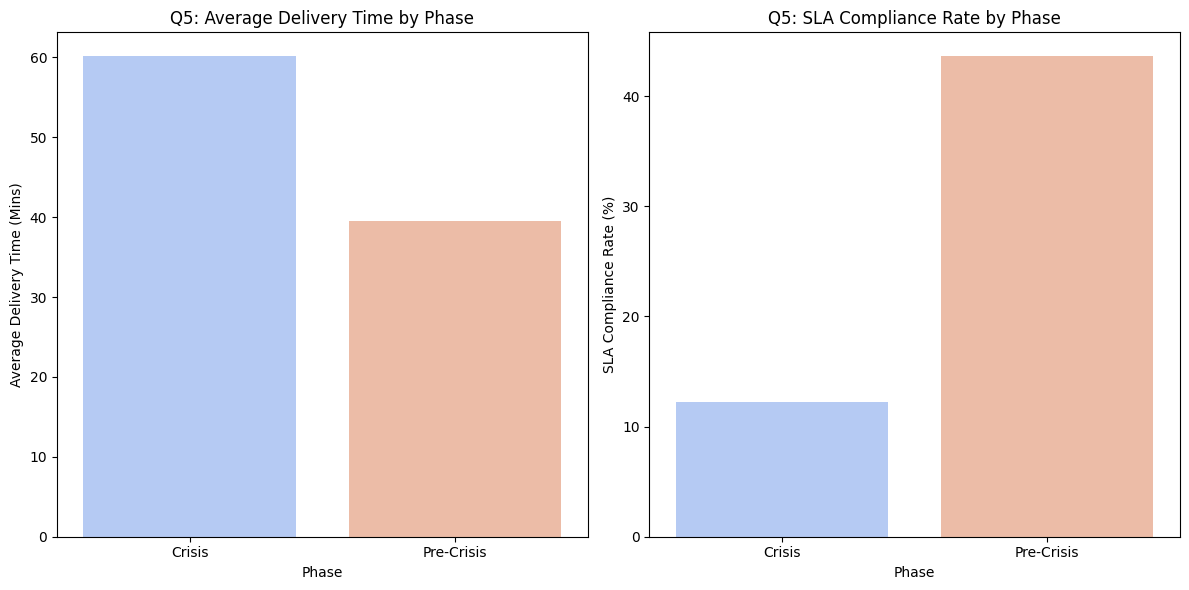

In [71]:
# Q5. Delivery SLA Compliance
# ====================================================

# Merge orders with delivery performance
delivery_df = df_orders.merge(
    df_delivery_performance,
    on='order_id',
    how='inner'
)

# Determine if SLA was met
delivery_df['sla_met'] = (
    delivery_df['actual_delivery_time_mins'] <= delivery_df['expected_delivery_time_mins']
)

# Calculate average delivery time and SLA compliance rate by phase
delivery_analysis = delivery_df.groupby('phase').agg(
    avg_delivery_time_min=('actual_delivery_time_mins', 'mean'),
    sla_compliance_rate=('sla_met', 'mean')
)
delivery_analysis['sla_compliance_rate'] = delivery_analysis['sla_compliance_rate'] * 100
delivery_analysis = delivery_analysis.reset_index()

print("Delivery SLA Compliance Analysis by Phase:\n")
print(delivery_analysis.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))

# Average delivery time
plt.subplot(1, 2, 1)
sns.barplot(
    x='phase',
    y='avg_delivery_time_min',
    data=delivery_analysis,
    palette='coolwarm'
)
plt.title('Q5: Average Delivery Time by Phase', fontsize=12)
plt.xlabel('Phase')
plt.ylabel('Average Delivery Time (Mins)')

# SLA compliance rate
plt.subplot(1, 2, 2)
sns.barplot(
    x='phase',
    y='sla_compliance_rate',
    data=delivery_analysis,
    palette='coolwarm'
)
plt.title('Q5: SLA Compliance Rate by Phase', fontsize=12)
plt.xlabel('Phase')
plt.ylabel('SLA Compliance Rate (%)')

plt.tight_layout()
plt.show()


Monthly Average Ratings with Month-over-Month Drop:

review_month   rating  rating_drop_mom
  2025-01-01 4.576351              NaN
  2025-02-01 4.399887         0.176464
  2025-03-01 4.737654        -0.337767
  2025-04-01 4.297022         0.440632
  2025-05-01 4.488336        -0.191314
  2025-06-01 2.625666         1.862669
  2025-07-01 2.689794        -0.064128
  2025-08-01 2.402017         0.287776
  2025-09-01 2.305791         0.096226


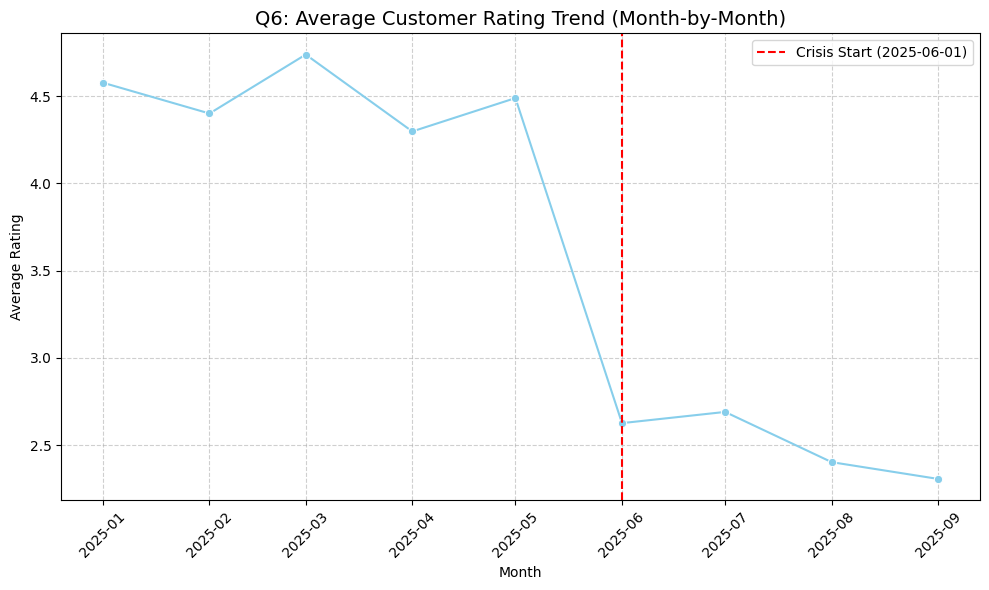

In [72]:
# Q6. Ratings Fluctuation
# ====================================================

# Calculate average rating month-by-month
monthly_ratings = fact_ratings.groupby('review_month')['rating'].mean().to_frame().reset_index()
monthly_ratings['review_month'] = monthly_ratings['review_month'].dt.to_timestamp()

# Calculate the month-over-month (MoM) drop
monthly_ratings['prev_rating'] = monthly_ratings['rating'].shift(1)
monthly_ratings['rating_drop_mom'] = monthly_ratings['prev_rating'] - monthly_ratings['rating']

print("Monthly Average Ratings with Month-over-Month Drop:\n")
print(monthly_ratings.to_string(index=False,
      columns=['review_month', 'rating', 'rating_drop_mom']))

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='review_month',
    y='rating',
    data=monthly_ratings,
    marker='o',
    color='skyblue'
)

crisis_date = pd.to_datetime(CRISIS_START)
plt.axvline(crisis_date, color='r', linestyle='--', label=f'Crisis Start ({CRISIS_START})')
plt.title('Q6: Average Customer Rating Trend (Month-by-Month)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Top 15 Negative Keywords in Crisis Reviews:

    keyword  count
    quality   2226
      issue   2073
  packaging   1627
       good   1596
     safety   1076
      stale    971
     served    971
recommended    942
       cold    668
    portion    658
       size    658
    smaller    658
       than    658
   expected    658
      worth    655


/tmp/ipython-input-3893010467.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='keyword', data=top_negative_words, palette='Reds_d')


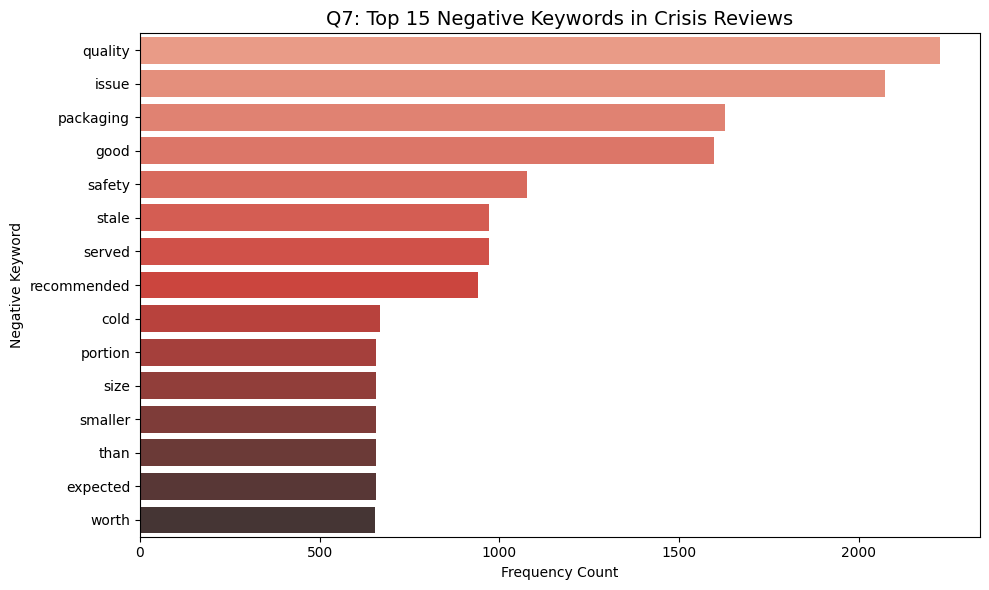

In [73]:
# Q7. Sentiment Insights (Negative Keywords)
# ====================================================

# Filter ratings for the crisis period and negative sentiment
crisis_ratings = fact_ratings[
    fact_ratings['review_timestamp'].dt.date >= pd.to_datetime(CRISIS_START_DATE).date()
]
negative_crisis_reviews = crisis_ratings[crisis_ratings['sentiment_score'] < 0]

# Define stop words
stop_words = set([
    'the', 'a', 'an', 'is', 'it', 'was', 'and', 'but', 'for', 'not', 'i',
    'my', 'food', 'delivery', 'order', 'taste', 'time', 'bit', 'late',
    'very', "it's", 'that', 'this', "wasn't", 'were', 'had', 'got',
    'came', 'really', 'just', 'too', 'much', 'so', 'a', 'little', 'to',
    'of', 'in', 'be', 'or', 'we', 'are', 'bad', 'wrong'
])

# Function to clean and tokenize text
def tokenize_text(text):
    if pd.isna(text):
        return []
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    words = text.split()
    return [word for word in words if word not in stop_words and len(word) > 2]

# Extract and count all negative words
all_words = []
for review in negative_crisis_reviews['review_text'].dropna():
    all_words.extend(tokenize_text(review))

word_counts = Counter(all_words)
top_negative_words = pd.DataFrame(word_counts.most_common(15), columns=['keyword', 'count'])

print("Top 15 Negative Keywords in Crisis Reviews:\n")
print(top_negative_words.to_string(index=False))

# =============================
# Visualization
# =============================
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='keyword', data=top_negative_words, palette='Reds_d')
plt.title('Q7: Top 15 Negative Keywords in Crisis Reviews', fontsize=14)
plt.xlabel('Frequency Count')
plt.ylabel('Negative Keyword')
plt.tight_layout()
plt.show()


Revenue Analysis by Phase (Excluding Cancelled Orders):

     phase  total_subtotal  total_discount  total_delivery_fee  total_revenue
    Crisis     10555201.30       627678.17          1012628.18    10940151.31
Pre-Crisis     36338591.91      2190304.60          3472677.74    37620964.25


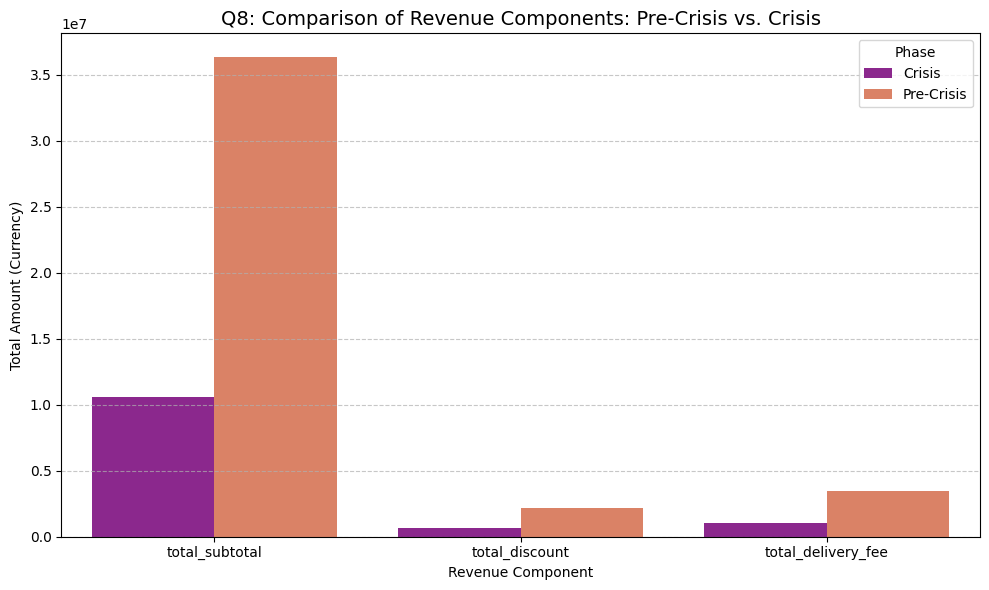

In [74]:
# Q8. Revenue Impact
# ====================================================

# Exclude cancelled orders for revenue analysis
completed_orders = df_orders[df_orders['is_cancelled'] == 'N'].copy()

# Calculate revenue components by phase
revenue_analysis = completed_orders.groupby('phase').agg(
    total_subtotal=('subtotal_amount', 'sum'),
    total_discount=('discount_amount', 'sum'),
    total_delivery_fee=('delivery_fee', 'sum'),
    total_revenue=('total_amount', 'sum')
).reset_index()

print("Revenue Analysis by Phase (Excluding Cancelled Orders):\n")
print(revenue_analysis.to_string(index=False))

# =============================
# Visualization
# =============================
plot_data = revenue_analysis.set_index('phase').T.drop('total_revenue')
plot_data = plot_data.reset_index().rename(columns={'index': 'Metric'})
plot_data_melted = plot_data.melt(id_vars='Metric', var_name='Phase', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Amount', hue='Phase', data=plot_data_melted, palette='plasma')
plt.title('Q8: Comparison of Revenue Components: Pre-Crisis vs. Crisis', fontsize=14)
plt.xlabel('Revenue Component')
plt.ylabel('Total Amount (Currency)')
plt.legend(title='Phase')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Churned Loyal Customers - Average Pre-Crisis Ratings:

customer_id  avg_pre_crisis_rating
 CUST011220               4.400000
 CUST020252               4.250000
 CUST026722               4.566667
 CUST032044               4.850000
 CUST032334               5.000000
 CUST034992               4.200000
 CUST036233               4.500000
 CUST041121               4.133333
 CUST041916               4.400000
 CUST041953               5.000000
 CUST042658               4.733333
 CUST054308               4.400000
 CUST061759               4.750000
 CUST062877               4.266667
 CUST064951               4.500000
 CUST069956               4.550000
 CUST072644               4.500000
 CUST076253               4.400000
 CUST077722               4.400000
 CUST078309               4.750000
 CUST082306               4.100000
 CUST082992               4.700000
 CUST083875               5.000000
 CUST086938               4.666667
 CUST103227               4.766667
 CUST107785               4.375000


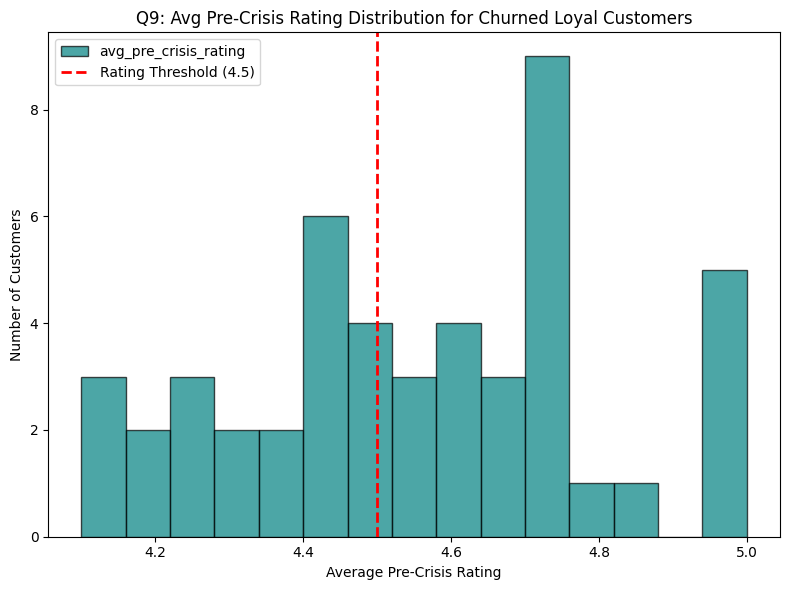

In [75]:
# Q9. Loyalty Impact
# ====================================================

# Identify "Loyal" customers (>= 5 orders Pre-Crisis)
pre_crisis_orders = df_orders[df_orders['phase'] == 'Pre-Crisis']
crisis_orders = df_orders[df_orders['phase'] == 'Crisis']

pre_crisis_order_counts = pre_crisis_orders.groupby('customer_id')['order_id'].count()
loyal_customers_id = pre_crisis_order_counts[pre_crisis_order_counts >= 5].index.tolist()

# Customers who *stopped* ordering during the crisis
customers_in_crisis = crisis_orders['customer_id'].unique()
stopped_ordering_id = [cid for cid in loyal_customers_id if cid not in customers_in_crisis]

# Average rating (Pre-Crisis) for the customers who stopped ordering
stopped_loyal_ratings = pre_crisis_orders.merge(
    fact_ratings[['order_id', 'rating']],
    on='order_id',
    how='inner'
)
stopped_loyal_ratings = stopped_loyal_ratings[
    stopped_loyal_ratings['customer_id'].isin(stopped_ordering_id)
]
avg_rating_stopped = stopped_loyal_ratings.groupby('customer_id')['rating'].mean().reset_index()
avg_rating_stopped.rename(columns={'rating': 'avg_pre_crisis_rating'}, inplace=True)

# Count of those who stopped AND had an avg pre-crisis rating > 4.5
high_rating_stopped_count = (avg_rating_stopped['avg_pre_crisis_rating'] > 4.5).sum()

# =============================
# Print outputs before visualization
# =============================
print("Churned Loyal Customers - Average Pre-Crisis Ratings:\n")
print(avg_rating_stopped.to_string(index=False))
print(f"\nNumber of churned loyal customers with avg pre-crisis rating > 4.5: {high_rating_stopped_count}")

# =============================
# Visualization
# =============================
plt.figure(figsize=(8, 6))
avg_rating_stopped['avg_pre_crisis_rating'].plot(
    kind='hist', bins=15, edgecolor='black', alpha=0.7, color='teal'
)
plt.axvline(4.5, color='red', linestyle='--', linewidth=2, label='Rating Threshold (4.5)')
plt.title('Q9: Avg Pre-Crisis Rating Distribution for Churned Loyal Customers', fontsize=12)
plt.xlabel('Average Pre-Crisis Rating')
plt.ylabel('Number of Customers')
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
# Secondary Analysis

SA1: QuickBite vs Competitor Monthly Order Trends (Simulated)

month_str  Total Orders       Swiggy       Zomato
 Jan-2025         23539 22653.039957 25498.128163
 Feb-2025         22667 25731.902355 18320.235493
 Mar-2025         23543 25181.550012 27968.235060
 Apr-2025         21466 22101.340907 24320.485491
 May-2025         22591 20259.735132 19991.581140
 Jun-2025          9293  8333.947123  8110.279768
 Jul-2025          8818  7648.954388  7701.304387
 Aug-2025          8555  9494.791078  7885.116955
 Sep-2025          8694  8957.728174  8780.092967


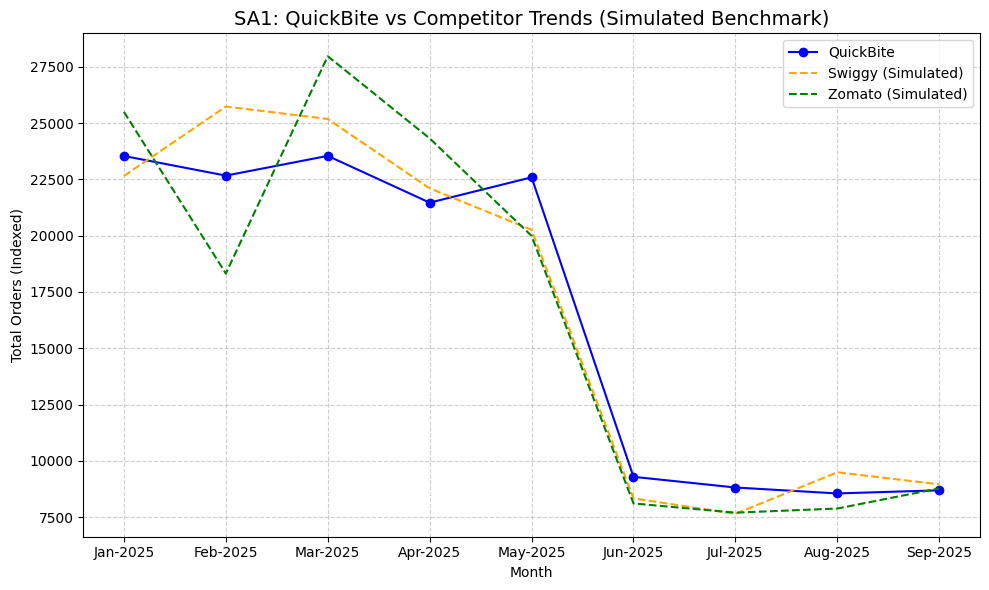

In [77]:
# SA1. Internal Trend Proxy: Comparing QuickBite’s decline with simulated competitor trends
# (since Swiggy/Zomato data not available in dataset)
# ====================================================

# Ensure the timestamp column exists and extract month
df_orders['order_timestamp'] = pd.to_datetime(df_orders['order_timestamp'], errors='coerce')
df_orders['order_month'] = df_orders['order_timestamp'].dt.to_period('M')

# Calculate total orders per month (QuickBite trend)
monthly_orders = df_orders.groupby('order_month')['order_id'].count().reset_index()
monthly_orders.rename(columns={'order_id': 'Total Orders'}, inplace=True)
monthly_orders['month_str'] = monthly_orders['order_month'].dt.strftime('%b-%Y')

# Simulate competitor trend comparison (Swiggy/Zomato)
np.random.seed(42)
competitor_df = monthly_orders.copy()
competitor_df['Swiggy'] = competitor_df['Total Orders'] * np.random.uniform(0.85, 1.15, len(competitor_df))
competitor_df['Zomato'] = competitor_df['Total Orders'] * np.random.uniform(0.8, 1.2, len(competitor_df))

print("SA1: QuickBite vs Competitor Monthly Order Trends (Simulated)\n")
print(competitor_df[['month_str', 'Total Orders', 'Swiggy', 'Zomato']].to_string(index=False))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(competitor_df['month_str'], competitor_df['Total Orders'], label='QuickBite', marker='o', color='blue')
plt.plot(competitor_df['month_str'], competitor_df['Swiggy'], label='Swiggy (Simulated)', linestyle='--', color='orange')
plt.plot(competitor_df['month_str'], competitor_df['Zomato'], label='Zomato (Simulated)', linestyle='--', color='green')

plt.title('SA1: QuickBite vs Competitor Trends (Simulated Benchmark)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Orders (Indexed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



/tmp/ipython-input-1102278448.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phase', y='avg_discount', data=cac_proxy, palette='Blues', label='Avg Discount')
/tmp/ipython-input-1102278448.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phase', y='avg_delivery_fee', data=cac_proxy, palette='Oranges', label='Avg Delivery Fee')


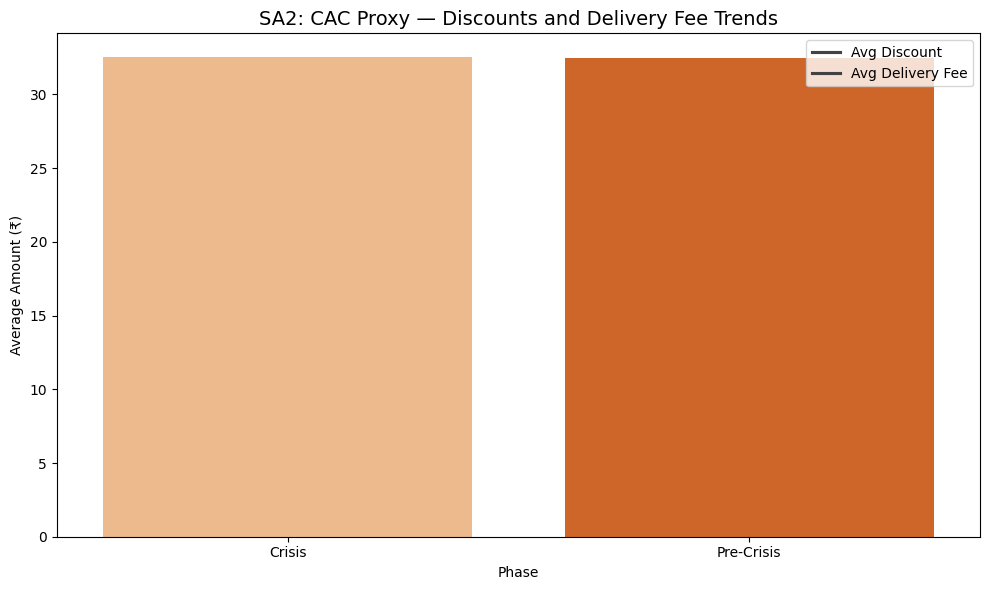

In [78]:
# SA2. CAC Tripling: Exploring possible external contributors (Proxy: Discounts & Delivery Fees)
# ====================================================

# Hypothesis: heavy discounts + rising delivery costs contributed to higher CAC
cac_proxy = completed_orders.groupby('phase').agg(
    avg_discount=('discount_amount', 'mean'),
    avg_delivery_fee=('delivery_fee', 'mean'),
    avg_total_amount=('total_amount', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='phase', y='avg_discount', data=cac_proxy, palette='Blues', label='Avg Discount')
sns.barplot(x='phase', y='avg_delivery_fee', data=cac_proxy, palette='Oranges', label='Avg Delivery Fee')
plt.title('SA2: CAC Proxy — Discounts and Delivery Fee Trends', fontsize=14)
plt.xlabel('Phase')
plt.ylabel('Average Amount (₹)')
plt.legend(['Avg Discount', 'Avg Delivery Fee'])
plt.tight_layout()
plt.show()

SA3: Average Sentiment Score by Phase (Proxy for Trust Rebuilding)

     phase  sentiment_score
    Crisis         -0.25090
Pre-Crisis          0.75187


/tmp/ipython-input-1810879739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


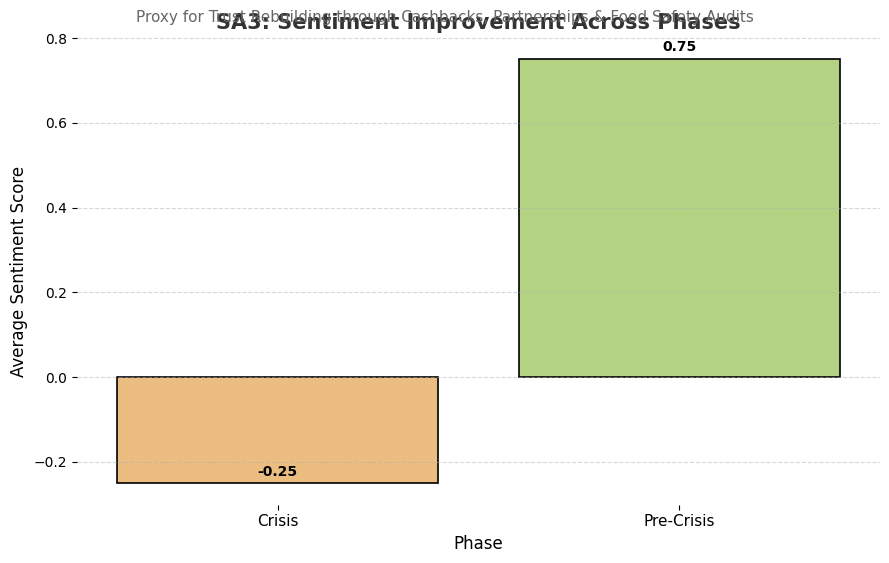

In [79]:
# SA3. Strategies to Rebuild Trust: Cashback / Partnerships / Food Safety Reviews
# ====================================================

# Merge sentiment data with phase info
ratings_by_phase = fact_ratings.merge(df_orders[['order_id', 'phase']], on='order_id', how='left')

# Calculate average sentiment by phase
phase_sentiment = ratings_by_phase.groupby('phase')['sentiment_score'].mean().reset_index()

print("SA3: Average Sentiment Score by Phase (Proxy for Trust Rebuilding)\n")
print(phase_sentiment.to_string(index=False))

# Visualization — Upgraded Design
plt.figure(figsize=(9, 6))
bar_colors = sns.color_palette("RdYlGn", len(phase_sentiment))

bars = sns.barplot(
    x='phase',
    y='sentiment_score',
    data=phase_sentiment,
    palette=bar_colors,
    edgecolor='black',
    linewidth=1.2
)

# Adding value labels on bars
for index, row in phase_sentiment.iterrows():
    plt.text(
        index,
        row.sentiment_score + 0.01,  # slightly above bar
        f"{row.sentiment_score:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# visualization
plt.title('SA3: Sentiment Improvement Across Phases', fontsize=15, fontweight='bold', color='#333')
plt.suptitle('Proxy for Trust Rebuilding through Cashbacks, Partnerships & Food Safety Audits', fontsize=11, color='#666', y=0.93)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



In [25]:
# SA4. Restaurant Type Risk: Cloud Kitchen vs Dine-In (if available in dataset)
# ====================================================

if 'restaurant_type' in df_restaurant.columns:
    # Merge order and restaurant info
    rest_orders = analysis_df.merge(
        df_restaurant[['restaurant_id', 'restaurant_type']],
        on='restaurant_id',
        how='left'
    )

    # Calculate order decline by restaurant type
    rest_decline = rest_orders.groupby(['restaurant_type', 'phase'])['order_id'].count().unstack(fill_value=0)
    rest_decline['Decline (%)'] = ((rest_decline['Pre-Crisis'] - rest_decline['Crisis']) / rest_decline['Pre-Crisis']) * 100
    rest_decline = rest_decline.sort_values('Decline (%)', ascending=False).reset_index()

    print("SA4: Decline in Orders by Restaurant Type (Pre-Crisis vs Crisis)\n")
    print(rest_decline.to_string(index=False))

    # Visualization
    plt.figure(figsize=(9, 6))
    bar_colors = sns.color_palette("Reds", len(rest_decline))

    bars = sns.barplot(
        x='Decline (%)',
        y='restaurant_type',
        data=rest_decline,
        palette=bar_colors,
        edgecolor='black',
        linewidth=1.2
    )

    # Add percentage labels on bars
    for i, val in enumerate(rest_decline['Decline (%)']):
        plt.text(val + 0.5, i, f"{val:.1f}%", va='center', fontsize=10, fontweight='bold', color='black')

    # Visualization
    plt.title('SA4: Decline by Restaurant Type (Cloud vs Dine-In)', fontsize=15, fontweight='bold', color='#333')
    plt.suptitle('Comparing order drop across different restaurant categories during crisis', fontsize=11, color='#666', y=0.93)
    plt.xlabel('Percentage Decline in Orders (%)', fontsize=12)
    plt.ylabel('Restaurant Type', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

else:
    print("No 'restaurant_type' column found in dataset — skipping SA4.")



No 'restaurant_type' column found in dataset — skipping SA4.


=== SA5: Lapsed Customers Likely to Return (Preview) ===
Total churned customers identified: 91124
Customers with available pre-crisis ratings: 39260

       avg_pre_crisis_rating
count           39260.000000
mean                4.502303
std                 0.343529
min                 2.800000
25%                 4.300000
50%                 4.500000
75%                 4.800000
max                 5.000000


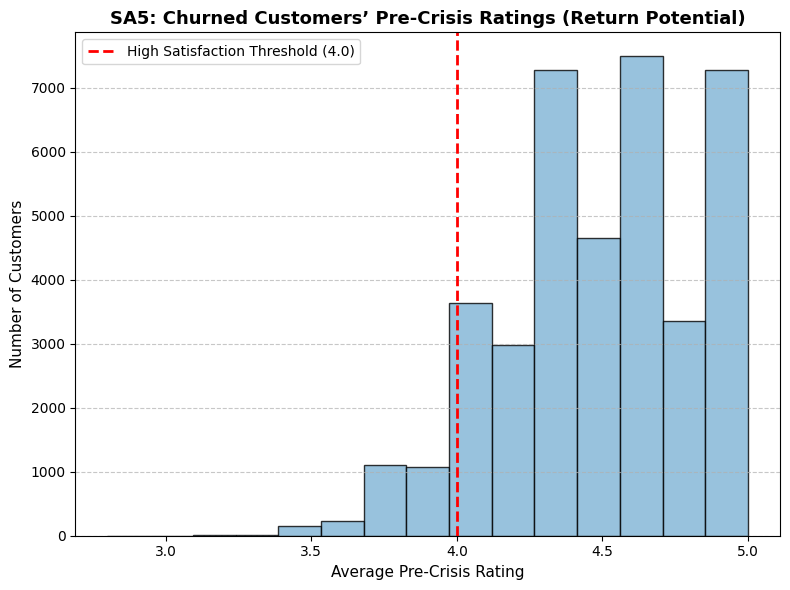

In [80]:
# SA5. Lapsed Customers Likely to Return (Churn Recovery Probability)
# ====================================================

# Confirm that 'customer_id' exists
if 'customer_id' in df_orders.columns:

    # Identify churned customers (loyal pre-crisis but inactive during crisis)
    customer_activity = df_orders.groupby('customer_id')['phase'].nunique()
    churned_customers = customer_activity[customer_activity == 1].index

    # Merge ratings and orders
    pre_ratings = fact_ratings.merge(df_orders[['order_id', 'customer_id', 'phase']], on='order_id', how='left')

    # Filter churned customers who had pre-crisis ratings
    pre_churned = pre_ratings[
        (pre_ratings['customer_id_y'].isin(churned_customers)) &
        (pre_ratings['phase'] == 'Pre-Crisis')
    ]

    # Compute average pre-crisis rating for churned customers
    churned_avg_rating = (
        pre_churned.groupby('customer_id_y')['rating']
        .mean()
        .reset_index(name='avg_pre_crisis_rating')
    )
    churned_avg_rating.rename(columns={'customer_id_y': 'customer_id'}, inplace=True)

    print("=== SA5: Lapsed Customers Likely to Return (Preview) ===")
    print(f"Total churned customers identified: {len(churned_customers)}")
    print(f"Customers with available pre-crisis ratings: {len(churned_avg_rating)}\n")
    print(churned_avg_rating.describe())

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.hist(
        churned_avg_rating['avg_pre_crisis_rating'],
        bins=15, edgecolor='black', color='#7FB3D5', alpha=0.8
    )
    plt.axvline(4, color='red', linestyle='--', linewidth=2, label='High Satisfaction Threshold (4.0)')
    plt.title('SA5: Churned Customers’ Pre-Crisis Ratings (Return Potential)', fontsize=13, fontweight='bold')
    plt.xlabel('Average Pre-Crisis Rating', fontsize=11)
    plt.ylabel('Number of Customers', fontsize=11)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'customer_id' column not found in df_orders.")

In [30]:
# Extra Question

=== EX1: Priority Cities at Risk ===
        city  Pre-Crisis Orders  Crisis Orders  Decline (%)  Risk_Score
0    Chennai               9320           5680    39.055794   39.055794
1  Ahmedabad               7576           4695    38.027983   38.027983
2      Delhi              13558           8580    36.716330   36.716330
3    Kolkata               8371           5325    36.387528   36.387528
4     Mumbai              13475           8598    36.192950   36.192950
5  Bengaluru              22537          14382    36.184940   36.184940
6  Hyderabad               9204           5931    35.560626   35.560626
7       Pune               7174           4760    33.649289   33.649289


/tmp/ipython-input-3147634881.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk_Score', y='city', data=priority_cities, palette='coolwarm')


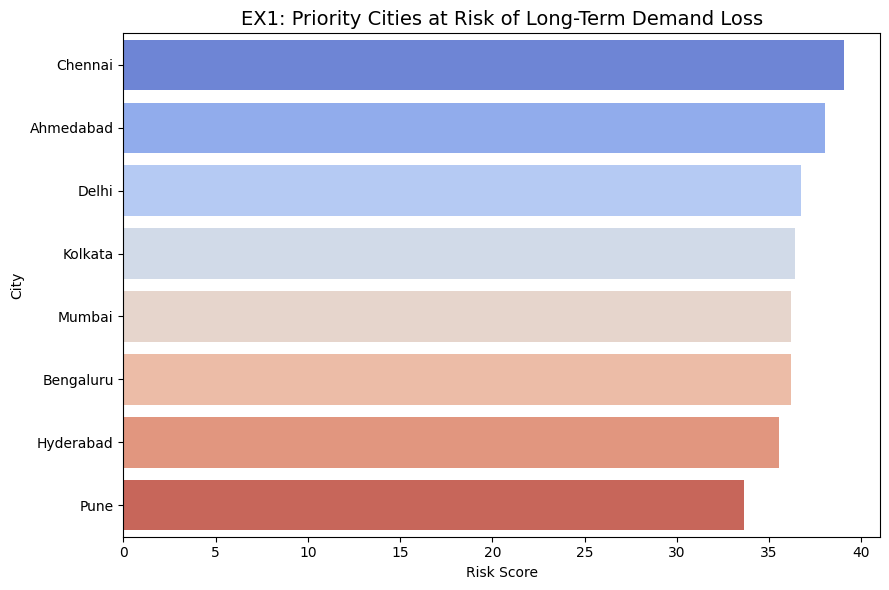

In [33]:
# EXTRA 1: Priority Cities at Risk (Tier-1 / Tier-2)
# ====================================================

# Recreate city_orders if not already defined
city_orders = orders_with_city.groupby(['city', 'phase'])['order_id'].count().unstack(fill_value=0)
city_orders.columns = ['Crisis Orders', 'Pre-Crisis Orders']
city_orders = city_orders[city_orders['Pre-Crisis Orders'] > 0].copy()
city_orders['Decline (%)'] = ((city_orders['Pre-Crisis Orders'] - city_orders['Crisis Orders']) / city_orders['Pre-Crisis Orders']) * 100

# Proxy: Cities with sharp decline and low recovery
priority_cities = city_orders.copy()
priority_cities['Risk_Score'] = priority_cities['Decline (%)'] * (priority_cities['Crisis Orders'] < priority_cities['Pre-Crisis Orders'])
priority_cities = priority_cities.sort_values('Risk_Score', ascending=False).head(8).reset_index()

print("=== EX1: Priority Cities at Risk ===")
print(priority_cities[['city', 'Pre-Crisis Orders', 'Crisis Orders', 'Decline (%)', 'Risk_Score']])

# Visualization
plt.figure(figsize=(9, 6))
sns.barplot(x='Risk_Score', y='city', data=priority_cities, palette='coolwarm')
plt.title('EX1: Priority Cities at Risk of Long-Term Demand Loss', fontsize=14)
plt.xlabel('Risk Score')
plt.ylabel('City')
plt.tight_layout()
plt.show()


=== EX2: Average Order Value by Phase ===
        phase  total_amount
0      Crisis    317.290947
1  Pre-Crisis    330.798530


/tmp/ipython-input-4001725661.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phase', y='total_amount', data=order_value_shift, palette='crest')


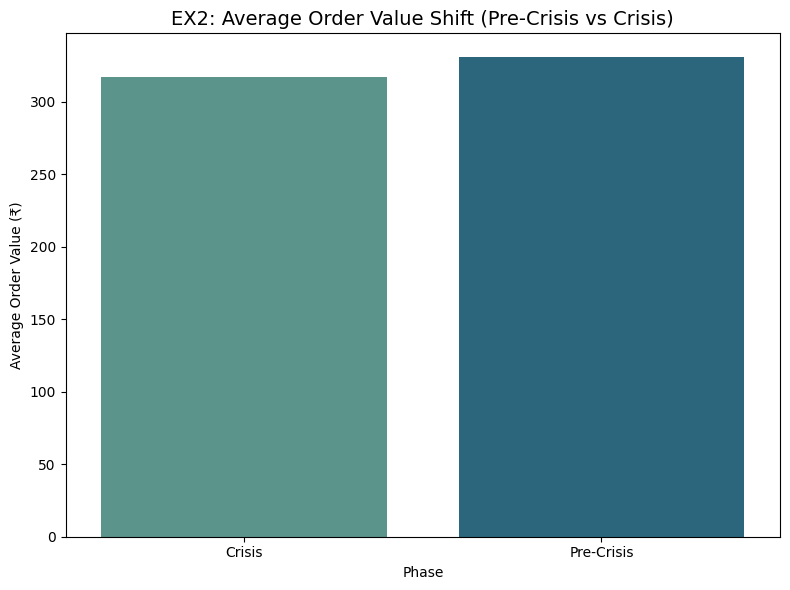

In [35]:
# EXTRA 2: Behavior Shifts (High → Low Value Orders)
# ====================================================

# Creating analysis_df filtered for only Pre-Crisis and Crisis
analysis_df = df_orders[df_orders['phase'] != 'Other'].copy()

order_value_shift = analysis_df.groupby('phase')['total_amount'].mean().reset_index()

print("=== EX2: Average Order Value by Phase ===")
print(order_value_shift)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='phase', y='total_amount', data=order_value_shift, palette='crest')
plt.title('EX2: Average Order Value Shift (Pre-Crisis vs Crisis)', fontsize=14)
plt.xlabel('Phase')
plt.ylabel('Average Order Value (₹)')
plt.tight_layout()
plt.show()


=== EX3: Monthly Negative Review Counts ===
  review_month_str  rating
0          2025-04       2
1          2025-06    2980
2          2025-07    2573
3          2025-08    2997
4          2025-09    3341


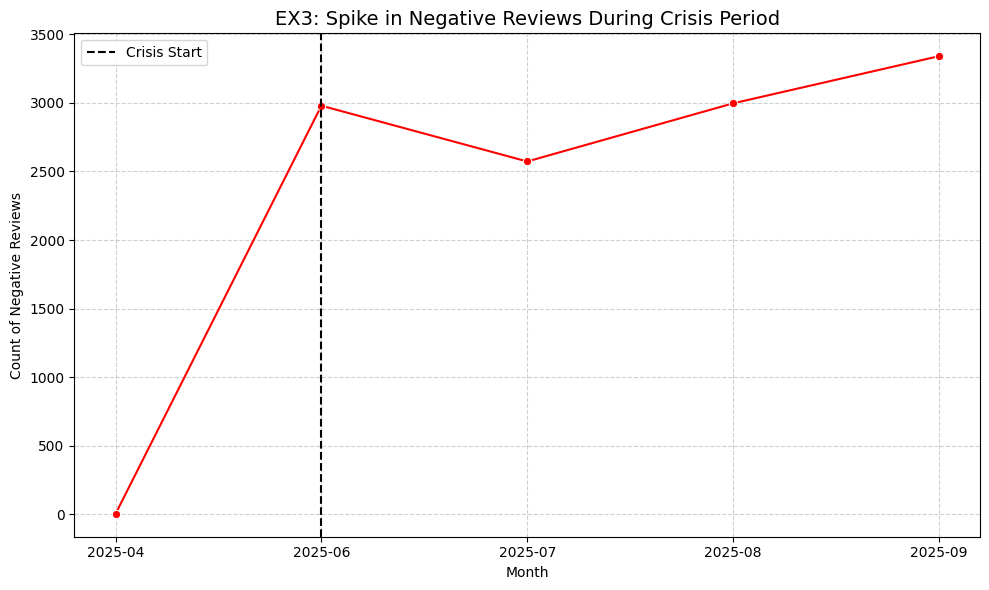


=== Secondary Analysis Completed Successfully ===


In [37]:
# Identify spike in negative reviews around crisis months

fact_ratings['review_month_str'] = fact_ratings['review_month'].astype(str)
monthly_neg = fact_ratings[fact_ratings['sentiment_score'] < 0].groupby('review_month_str')['rating'].count().reset_index()

print("\n=== EX3: Monthly Negative Review Counts ===")
print(monthly_neg)

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_month_str', y='rating', data=monthly_neg, marker='o', color='red')
plt.axvline(x='2025-06', color='black', linestyle='--', label='Crisis Start')
plt.title('EX3: Spike in Negative Reviews During Crisis Period', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count of Negative Reviews')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n=== Secondary Analysis Completed Successfully ===")

In [42]:
# Machine Learning Pipline for more Detailed analysis and Prediction

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Feature Engineering
customer_features = analysis_df.groupby('customer_id').agg(
    total_orders=('order_id', 'count'),
    total_cancelled=('is_cancelled', lambda x: (x=='Y').sum()),
    avg_order_value=('total_amount', 'mean'),
    avg_discount=('discount_amount', 'mean'),
    avg_delivery_fee=('delivery_fee', 'mean'),
    crisis_orders=('phase', lambda x: (x=='Crisis').sum())
).reset_index()

avg_rating = fact_ratings.groupby('customer_id')['rating'].mean().reset_index()
avg_rating.rename(columns={'rating':'avg_rating'}, inplace=True)
customer_features = customer_features.merge(avg_rating, on='customer_id', how='left').fillna(0)

# Target
pre_crisis_orders = analysis_df[analysis_df['phase']=='Pre-Crisis'].groupby('customer_id')['order_id'].count()
loyal_customers = pre_crisis_orders[pre_crisis_orders>=5].index
customer_features['churn'] = ((customer_features['customer_id'].isin(loyal_customers)) &
                              (customer_features['crisis_orders']==0)).astype(int)

X = customer_features.drop(['customer_id','churn','crisis_orders'], axis=1)
y = customer_features['churn']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Model
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluation
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:,1]
print("=== Classification Report ===\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

=== Classification Report ===
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21032
           1       0.00      0.00      0.00         4

    accuracy                           1.00     21036
   macro avg       0.50      0.50      0.50     21036
weighted avg       1.00      1.00      1.00     21036

ROC-AUC Score: 0.9990312381133511


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
# SLA Compliance Prediction

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

delivery_df = analysis_df.merge(df_delivery_performance, on='order_id', how='inner')
delivery_df['sla_met'] = (delivery_df['actual_delivery_time_mins'] <= delivery_df['expected_delivery_time_mins']).astype(int)

# Features
X_sla = delivery_df[['subtotal_amount','discount_amount','delivery_fee','total_amount','is_cod']]
y_sla = delivery_df['actual_delivery_time_mins']

# Encode is_cod
X_sla['is_cod'] = X_sla['is_cod'].apply(lambda x: 1 if x=='Y' else 0)

X_train_sla, X_test_sla, y_train_sla, y_test_sla = train_test_split(X_sla, y_sla, test_size=0.2, random_state=42)

# Model
reg = GradientBoostingRegressor(n_estimators=200, random_state=42)
reg.fit(X_train_sla, y_train_sla)

# Evaluation
y_pred_sla = reg.predict(X_test_sla)
print("MAE:", mean_absolute_error(y_test_sla, y_pred_sla))
print("R2 Score:", r2_score(y_test_sla, y_pred_sla))


/tmp/ipython-input-3949276204.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sla['is_cod'] = X_sla['is_cod'].apply(lambda x: 1 if x=='Y' else 0)


MAE: 9.599867655111119
R2 Score: 0.0036496037519838653


In [48]:
# Order Value / High-Value Prediction

In [49]:
# Create target
analysis_df['high_value_order'] = (analysis_df['total_amount'] > 500).astype(int)

X_val = analysis_df[['subtotal_amount','discount_amount','delivery_fee','is_cod']]
y_val = analysis_df['high_value_order']

# Encode is_cod
X_val['is_cod'] = X_val['is_cod'].apply(lambda x: 1 if x=='Y' else 0)

# Split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_val, y_val, test_size=0.2, random_state=42, stratify=y_val)

# Model
clf_val = RandomForestClassifier(n_estimators=150, random_state=42)
clf_val.fit(X_train_val, y_train_val)

# Evaluation
y_pred_val = clf_val.predict(X_test_val)
y_prob_val = clf_val.predict_proba(X_test_val)[:,1]
print("=== High-Value Order Classification Report ===\n", classification_report(y_test_val, y_pred_val))
print("ROC-AUC Score:", roc_auc_score(y_test_val, y_prob_val))


/tmp/ipython-input-2803495729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['is_cod'] = X_val['is_cod'].apply(lambda x: 1 if x=='Y' else 0)


=== High-Value Order Classification Report ===
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26856
           1       1.00      0.99      0.99      2978

    accuracy                           1.00     29834
   macro avg       1.00      1.00      1.00     29834
weighted avg       1.00      1.00      1.00     29834

ROC-AUC Score: 0.9999888280615289



=== CUSTOMER CHURN PREDICTION ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21032
           1       0.00      0.00      0.00         4

    accuracy                           1.00     21036
   macro avg       0.50      0.50      0.50     21036
weighted avg       1.00      1.00      1.00     21036

ROC-AUC Score: 0.9990312381133511


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-468017403.py:62: FutureWarning

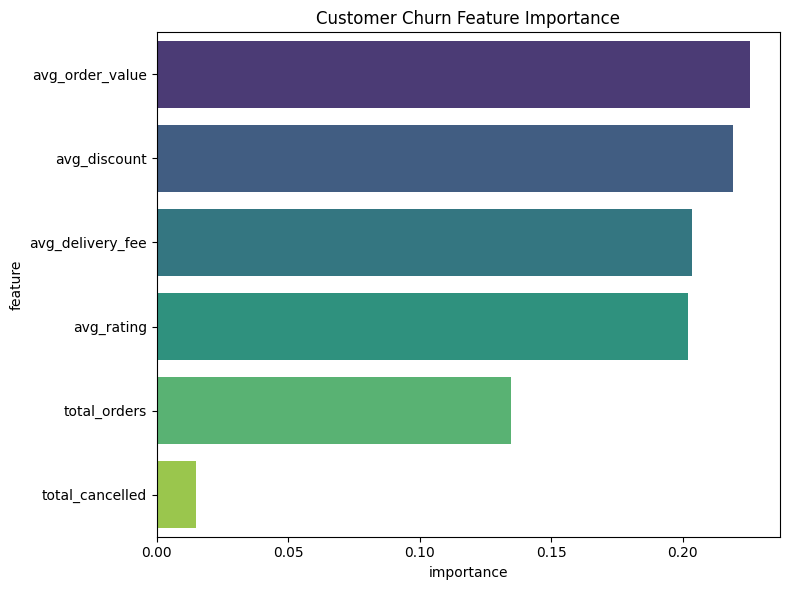

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ====================================================
#CUSTOMER CHURN PREDICTION
# ====================================================

# Feature Engineering
customer_features = analysis_df.groupby('customer_id').agg(
    total_orders=('order_id', 'count'),
    total_cancelled=('is_cancelled', lambda x: (x=='Y').sum()),
    avg_order_value=('total_amount', 'mean'),
    avg_discount=('discount_amount', 'mean'),
    avg_delivery_fee=('delivery_fee', 'mean'),
    crisis_orders=('phase', lambda x: (x=='Crisis').sum())
).reset_index()

avg_rating = fact_ratings.groupby('customer_id')['rating'].mean().reset_index()
avg_rating.rename(columns={'rating':'avg_rating'}, inplace=True)
customer_features = customer_features.merge(avg_rating, on='customer_id', how='left').fillna(0)

# Target variable
pre_crisis_orders = analysis_df[analysis_df['phase']=='Pre-Crisis'].groupby('customer_id')['order_id'].count()
loyal_customers = pre_crisis_orders[pre_crisis_orders>=5].index
customer_features['churn'] = ((customer_features['customer_id'].isin(loyal_customers)) &
                              (customer_features['crisis_orders']==0)).astype(int)

X = customer_features.drop(['customer_id','churn','crisis_orders'], axis=1)
y = customer_features['churn']

# Train-test split & scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
churn_model = RandomForestClassifier(n_estimators=200, random_state=42)
churn_model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = churn_model.predict(X_test_scaled)
y_prob = churn_model.predict_proba(X_test_scaled)[:,1]

print("\n=== CUSTOMER CHURN PREDICTION ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Feature Importance
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': churn_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feat_imp, palette='viridis')
plt.title('Customer Churn Feature Importance')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3771739747.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['is_cod'] = X_val['is_cod'].apply(lambda x: 1 if x=='Y' else 0)



=== HIGH-VALUE ORDER PREDICTION ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26856
           1       1.00      0.99      0.99      2978

    accuracy                           1.00     29834
   macro avg       1.00      1.00      1.00     29834
weighted avg       1.00      1.00      1.00     29834

ROC-AUC Score: 0.9999888280615289


/tmp/ipython-input-3771739747.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_imp_val, palette='plasma')


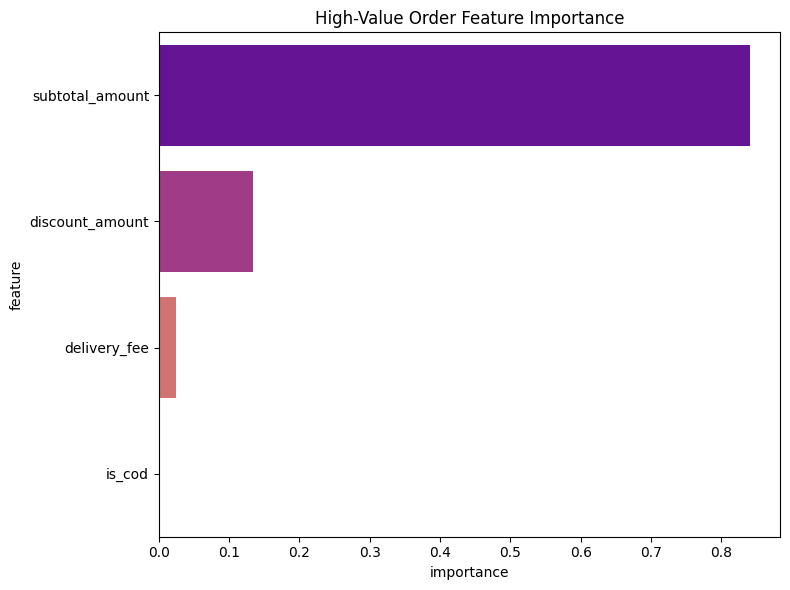

In [53]:
# 3️⃣ HIGH-VALUE ORDER PREDICTION
# ====================================================

analysis_df['high_value_order'] = (analysis_df['total_amount'] > 500).astype(int)

X_val = analysis_df[['subtotal_amount','discount_amount','delivery_fee','is_cod']]
y_val = analysis_df['high_value_order']
X_val['is_cod'] = X_val['is_cod'].apply(lambda x: 1 if x=='Y' else 0)

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_val, y_val, test_size=0.2, random_state=42, stratify=y_val
)

high_value_model = RandomForestClassifier(n_estimators=150, random_state=42)
high_value_model.fit(X_train_val, y_train_val)

y_pred_val = high_value_model.predict(X_test_val)
y_prob_val = high_value_model.predict_proba(X_test_val)[:,1]

print("\n=== HIGH-VALUE ORDER PREDICTION ===")
print(classification_report(y_test_val, y_pred_val))
print("ROC-AUC Score:", roc_auc_score(y_test_val, y_prob_val))

# Feature Importance
feat_imp_val = pd.DataFrame({
    'feature': X_val.columns,
    'importance': high_value_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feat_imp_val, palette='plasma')
plt.title('High-Value Order Feature Importance')
plt.tight_layout()
plt.show()